# Individual Project Planning: PLAIcraft

https://github.com/audreyw28/DSCI-100-Project.git

A research group at UBC collected data about how people play video games using a MineCraft server and recording players' actions. 

In [5]:
library(tidyverse)
library(scales)

### 1) Data Description

#### Players Dataset:

- number of observations,
- summary statistics (report values to 2 decimal places),
- number of variables,
- name and type of variables,
- what the variables mean,
- any issues you see in the data,
- any other potential issues related to things you cannot directly see,
- how the data were collected, etc

In [6]:
players <- read_csv("https://raw.githubusercontent.com/audreyw28/DSCI-100-Project/refs/heads/main/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [7]:
players_range <- players|>
    summarize(played_hours_range = range(played_hours), 
              age_range = range(Age, na.rm = TRUE))
players_range

players_stats <- players|>
    summarize(played_hours_mean = round(mean(played_hours), 2),
              played_hours_sd = round(sd(played_hours), 2),
              age_mean = round(mean(Age, na.rm = TRUE), 2), 
              age_sd = round(sd(Age, na.rm = TRUE), 2))
players_stats

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


played_hours_range,age_range
<dbl>,<dbl>
0.0,9
223.1,58


played_hours_mean,played_hours_sd,age_mean,age_sd
<dbl>,<dbl>,<dbl>,<dbl>
5.85,28.36,21.14,7.39


Data regarding all the players' information was collected as players signed in to play the game. 

For the `players` dataset, there are:
- 196 observations, each of one player
- 7 variables, which are:

| Variable | Type | Description |
|:---|:---|:---|
| experience | character | experience level of player |
| subscribe | logical | whether the player has subscribed or not |
| hashedEmail | character | hashed email of player |
| player_hours | double | number of hours played (hours)|
| name | character | name of player |
| gender | character | gender of player |
| Age | double | age of player (years) |

`played_hours` has: 
- range of 0 - 223.1
- mean of 5.85
- standard deviation of 28.36

`Age` has:
- range of 9 - 58
- mean of 21.14
- standard deviation of 7.39

Issues exist in this dataset in that:

Visible within data: 
- many of the players' ages weren't recorded (NA), which results in less accuracy when performing summary statistics for `Age`

Invisible: 
-  the experience levels were entered by players themselves/not obtained through a systematic method, so they could be biased

### Sessions Dataset:

In [8]:
sessions <- read_csv("https://raw.githubusercontent.com/audreyw28/DSCI-100-Project/refs/heads/main/sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [9]:
sessions_stats <- sessions |>
    summarize(original_start_mean = round(mean(original_start_time), 2),
            original_start_sd = round(sd(original_start_time), 2), 
             original_end_mean = round(mean(original_end_time, na.rm = TRUE), 2),
             original_end_sd = round(sd(original_end_time, na.rm = TRUE), 2))
sessions_stats

original_start_mean,original_start_sd,original_end_mean,original_end_sd
<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,3557491589,1.719196e+12,3552813134


Data regarding each player's sessions times were recorded through monitoring the game.  

For the sessions dataset, there are:
- 1535 observations, each of one session
- 5 variables, which are:

| Variable | Type | Description |
|:---|:---|:---|
| hashedEmail | character | hashed email of player |
| start_time | character | start time of session (date-time)|
| end_time | character | end time of session (date-time)|
| original_start_time | double | start time in milliseconds (UNIX) |
| original_end_time | double | end time in milliseconds (UNIX) |

`original_start_time` has:
- mean of 1.719201e+12
- standard deviation of 3557491589

`original_end_time` has:
- mean of 1.719196e+12
- standard deviation of 3552813134

Issues exist in this dataset in that: 
- `original_start_time` and `original_end_time` are in UNIX time, which are rounded so the two values in one observation may be identical --> accuracy is lost when performing summary statistics.
- `start_time` and `end_time` variables are not tidy; they are `chr` variables in day/month/year/time format which means many things are measured at once and summary statistics cannot be performed on said columns. 

## 2) Questions

- Clearly state one broad question that you will address
 -  specific question that you have formulated.
 -  Your question should involve one response variable of interest and one or more explanatory variables,
 -  Describe clearly how the data will help you address the question of interest.
 -  You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.)

The broad question I will address is Question 2: "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts." The team wants to obtain data about how people play games, so having a high `played_hours` value means large data contribution. 

My specific question: Can `Age` predict `played_hours` in the `players` dataset?   

The `players` dataset will make this regression problem possible by providing each player's total `played_hours` and respective `Age`, so I can train my model to predict future `played_hours` given a player's `Age`. 

## 3) Exploratory Data Analysis and Visualization

- Demonstrate that the dataset can be loaded into R.
- Do the minimum necessary wrangling to turn your data into a tidy format. 
- Compute the mean value for each quantitative variable in the players.csv data set.
- Make a few exploratory visualizations of the data to help you understand it.
- Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
- Explain any insights you gain from these plots that are relevant to address your question

In [10]:
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Dataset is tidy; my variables of interest (`played_hours` and `Age`) are in separate columns, each observation is one player.

In [11]:
means <- players|>
    summarize(mean_played_hours = round(mean(played_hours), 2),                   
            mean_age = round(mean(Age, na.rm = TRUE), 2))
means

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


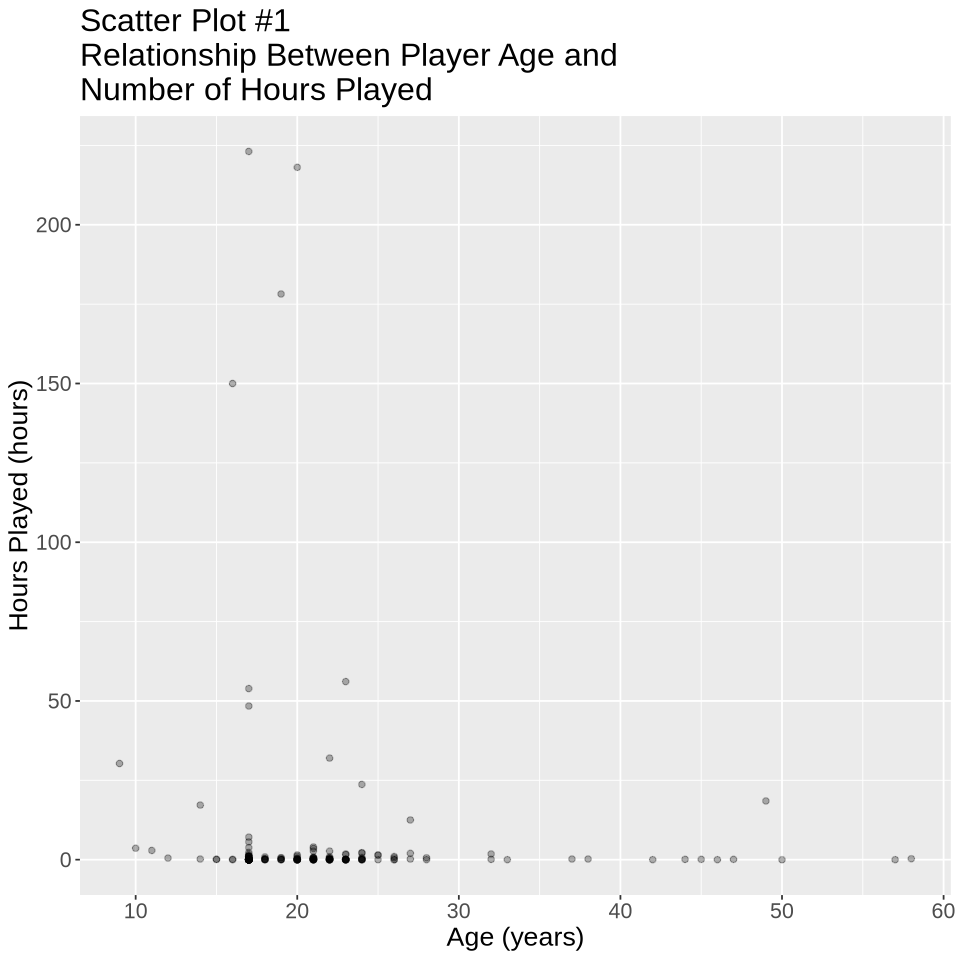

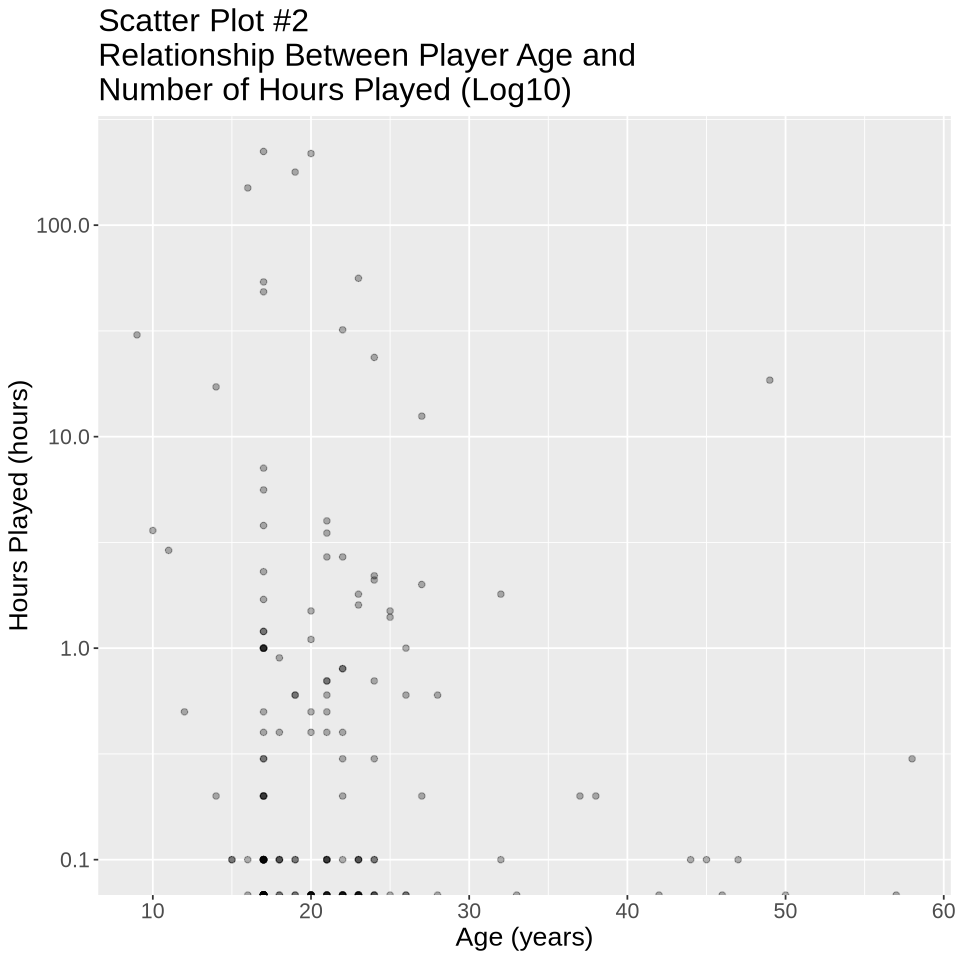

In [12]:
options(repr.plot.height = 8, repr.plot.width = 8)
trend <- ggplot(players, aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.3) +
    labs(x = "Age (years)", 
         y = "Hours Played (hours)", 
         title = "Scatter Plot #1\nRelationship Between Player Age and\nNumber of Hours Played") +
    theme(text = element_text(size = 16))
trend

trend_log <- ggplot(players, aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.3) +
    labs(x = "Age (years)", 
         y = "Hours Played (hours)", 
         title = "Scatter Plot #2\nRelationship Between Player Age and\nNumber of Hours Played (Log10)") +
    theme(text = element_text(size = 16)) +
    scale_y_log10(labels = label_comma())
trend_log

From both a regular and log scatter plot of `played_hours` vs `Age`, we can observe that the relationship is non-linear. Therefore, we might want to use the K-nearest-neighbors model to perform regression. 

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


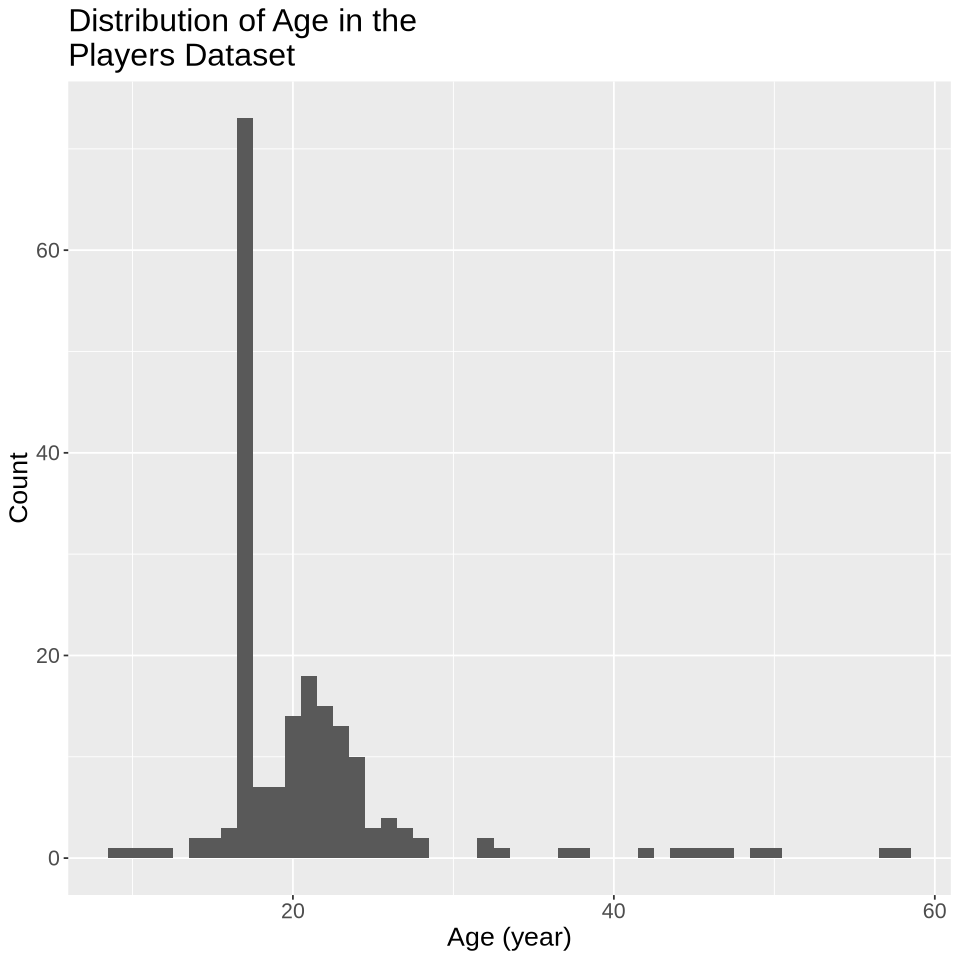

In [13]:
# most_observations_age <- players |>
#     group_by(Age)|>
#     summarize(count = n()) |>
#     slice_max(count , n = 1)
# most_observations_age

options(repr.plot.height = 8, repr.plot.width = 8)
age_distribution <- ggplot(players, aes(x = Age)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Age (year)", y = "Count", title = "Distribution of Age in the\nPlayers Dataset")+
    theme(text = element_text(size = 16))
age_distribution

From a histogram representing the distribution of players' age, we can observe that the majority of players are 17 year olds, with over 73 observations. That means there are high levels of uncertainty in predicting `played_hours` in this age; data is very spread (as seen both from the scatter plot #1 and our calculated standard deviation of 28.36). 

As ages increase, there is a different but equally as important kind of uncertainty because there are less data points to pick neighbors from. Therefore, the predicted response will be more biased towards the `played_hours` of the younger ages as ages increase. 

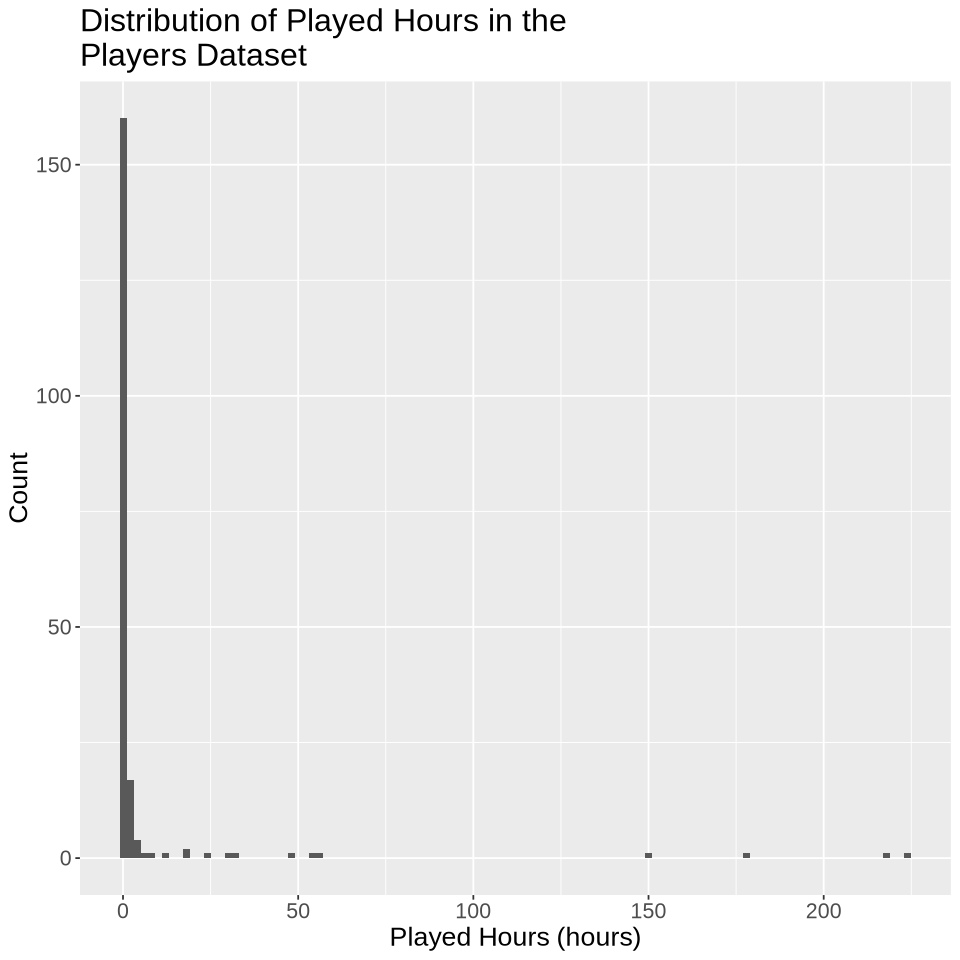

In [15]:
options(repr.plot.height = 8, repr.plot.width = 8)
played_hours_distribution <- ggplot(players, aes(x = played_hours)) +
    geom_histogram(binwidth = 2) +
    labs(x = "Played Hours (hours)", y = "Count", title = "Distribution of Played Hours in the\nPlayers Dataset")+
    theme(text = element_text(size = 16))
played_hours_distribution

From a histogram representing the distribution of played_hours, we can observe that the majority players played 0 hours. The imbalance of response variable doesn't affect knn regression greatly because we are taking the mean of closest neighbors.

## 4) Methods and Plan

Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

- Why is this method appropriate?
- Which assumptions are required, if any, to apply the method selected?
- What are the potential limitations or weaknesses of the method selected?
- How are you going to compare and select the model?
- How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

- I will use K-nearest-neighbors regression with predictor variable `Age` to predict response variable `played_hours`. This method is appropriate because relationship between our response and predictor variables is not linear.
- This model will have few assumptions on the shape of the data, but will assume that data points with similar `Age` values have similar `played_hours` values.
- Potential limitation: cannot predict played_hours beyond given range of age, may become very slow as the training data gets larger

Some steps I will take to build model:
1. Split data once into 70% training and 30% testing since this is the most commonly used split proportion with my current experience of predictive analysis.
2. The data will be preprocessed since there is only one predictor variable.
3. Perform cross validation with 5 folds (most commonly used in this course, saves time in running the code) on neighbors of 1-30 (I chose a max neighbor of ~1/5 of the training data observations) to tune the model.
4. Select the K neighbors with the lowest cross-validated RMSE for our final model. 